In [24]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt


In [25]:
images=r'D:\mtech\iii\project\proper dataset\unet\images'                                                                            
mask=r'D:\mtech\iii\project\proper dataset\unet\masks'  

In [26]:
def unet(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)

    # Expansive path
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same', activation='relu', kernel_initializer='he_normal')(conv5)
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same', activation='relu', kernel_initializer='he_normal')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same', activation='relu', kernel_initializer='he_normal')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same', activation='relu', kernel_initializer='he_normal')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs, conv10)

    return model


In [27]:
def load_data(image_dir, mask_dir, target_size=(256,256)):
    images = []
    masks = []
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename)  # assuming mask and image have the same filenames

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, target_size)
        mask = cv2.resize(mask, target_size)

        images.append(img)
        masks.append(mask)

    images = np.array(images).reshape((-1, *target_size, 1)) / 255.0
    masks = np.array(masks).reshape((-1, *target_size, 1)) / 255.0
    return images, masks

images, masks = load_data(images, mask)


In [28]:
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                        

In [29]:
# Train the model
history = model.fit(images, masks, batch_size=2, epochs=10, validation_split=0.1)

Epoch 1/10


502/502 [==============================] - 2675s 5s/step - loss: 0.1855 - accuracy: 0.9791 - val_loss: 0.0684 - val_accuracy: 0.9871
Epoch 2/10
502/502 [==============================] - 2661s 5s/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.0526 - val_accuracy: 0.9864
Epoch 3/10
502/502 [==============================] - 2628s 5s/step - loss: 0.0614 - accuracy: 0.9814 - val_loss: 0.0528 - val_accuracy: 0.9848
Epoch 4/10
502/502 [==============================] - 2633s 5s/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0624 - val_accuracy: 0.9874
Epoch 5/10
502/502 [==============================] - 2624s 5s/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 6/10
502/502 [==============================] - 2645s 5s/step - loss: 0.0454 - accuracy: 0.9879 - val_loss: 0.0690 - val_accuracy: 0.9863
Epoch 7/10
502/502 [==============================] - 2757s 5s/step - loss: 0.0481 - accuracy: 0.9861 - val_loss: 0.0415 - val_accurac

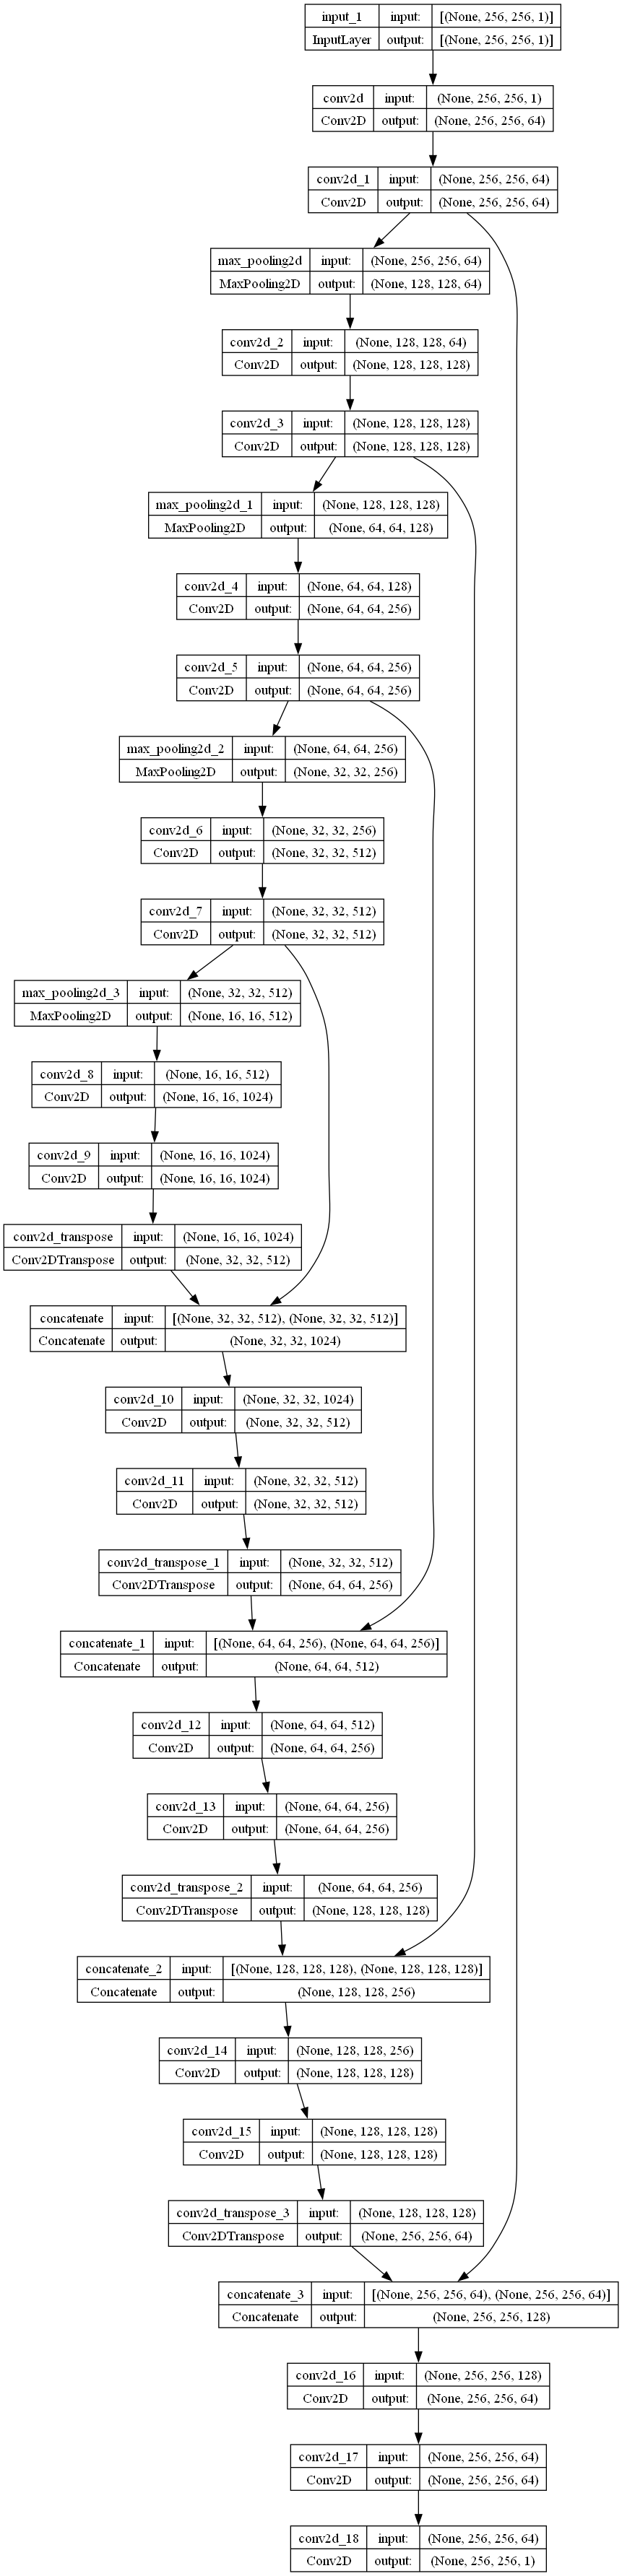

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

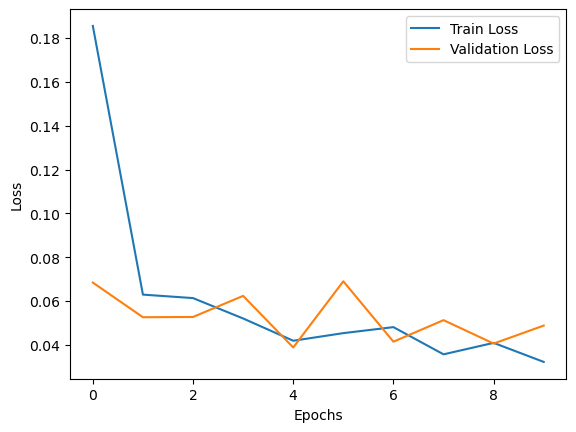

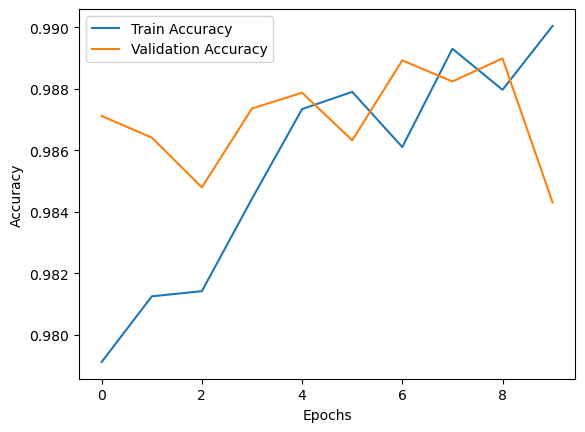

<Figure size 640x480 with 0 Axes>

In [31]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

model_path = r'D:\mtech\iii\project\bt classification in 4(new)\path_to_your_model.h5'
# Load the pre-trained model (if not already loaded)
model.save('path_to_your_model.h5')

def preprocess_image(img_path, target_size=(256, 256)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # or cv2.IMREAD_COLOR if your model uses color images
    img = cv2.resize(img, target_size)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

test_image_path = r'D:\mtech\iii\project\proper dataset\unet\images\3.png'
test_image = preprocess_image(test_image_path)


c:\Users\Deepak\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
predicted_mask = model.predict(test_image)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Apply a threshold to convert probabilities to binary mask


1/1 [==============================] - 3s 3s/step


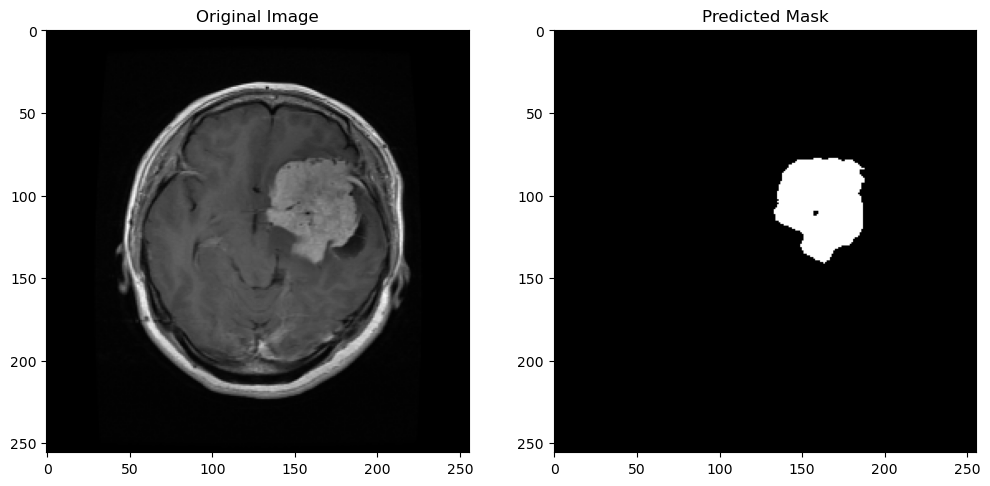

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(np.squeeze(test_image), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Predicted Mask')
plt.imshow(np.squeeze(predicted_mask), cmap='gray')
plt.show()


c:\Users\Deepak\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


1/1 [==============================] - 1s 816ms/step


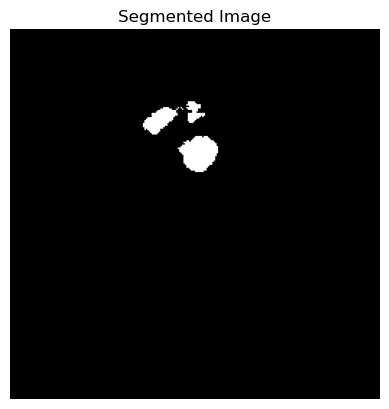

GLCM Properties:
Brightness of the segmented mask: 0.01300048828125
GLCM Properties:
Angular Second Moment (Energy): 0.97160780473426
Contrast: 168.216796875
Correlation: 0.8998044017814204
Variance: 839.2159993883813
Inverse Difference Moment (Homogeneity): 0.997413084045228
Sum Average: 6.669301470588236
Sum Variance: 3188.647200678525
Sum Entropy: 0.11826478771786282
Entropy: 0.12085174345604045
Difference Variance: 0.003870834240255793
Difference Entropy: 0.025913188831278237
Information Measures of Correlation 1: -0.7982856497053137
Information Measures of Correlation 2: 0.3850745680936808


In [35]:
import numpy as np
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import mahotas as mh

# Load the pre-trained model
model = load_model('path_to_your_model.h5')

# Function to process image
def process_image(image_path, image_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    img = resize(img, image_size, mode='constant', preserve_range=True)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load and process the test image
test_image_path = r'D:\mtech\iii\project\bt classification in 4\Training\glioma_tumor\gg (3).jpg'
processed_img = process_image(test_image_path)

# Predict the mask
predicted_mask = model.predict(processed_img)
predicted_mask = predicted_mask > 0.5  # Threshold the predictions
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension

# Convert predicted mask to uint8
predicted_mask_uint8 = (predicted_mask * 255).astype(np.uint8)

# Compute GLCM using Mahotas
glcm = mh.features.haralick(predicted_mask_uint8)
glcm_mean = glcm.mean(axis=0)

# Display the results
plt.imshow(predicted_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

# Print GLCM properties
print("GLCM Properties:")
brightness_segmented = np.mean(predicted_mask)
print(f"Brightness of the segmented mask: {brightness_segmented}")
properties = [
    'Angular Second Moment (Energy)',
    'Contrast',
    'Correlation',
    'Variance',
    'Inverse Difference Moment (Homogeneity)',
    'Sum Average',
    'Sum Variance',
    'Sum Entropy',
    'Entropy',
    'Difference Variance',
    'Difference Entropy',
    'Information Measures of Correlation 1',
    'Information Measures of Correlation 2'
]

# Iterate through properties list and print each one
print("GLCM Properties:")
for i, prop in enumerate(properties):
    print(f"{prop}: {glcm_mean[i]}")


1/1 [==============================] - 1s 802ms/step


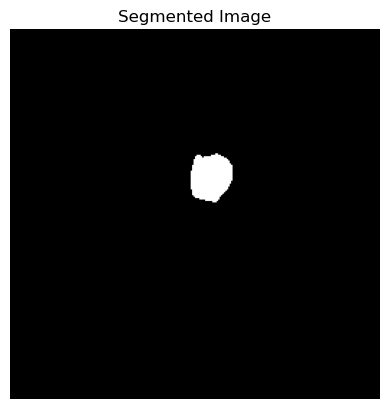

GLCM Properties:
Brightness of the segmented mask: 0.011932373046875
GLCM Properties:
Angular Second Moment (Energy): 0.9750560442047593
Contrast: 79.873046875
Correlation: 0.9482274689796
Variance: 771.1048761664497
Inverse Difference Moment (Homogeneity): 0.9987716752241411
Sum Average: 6.121354166666666
Sum Variance: 3004.5464577907987
Sum Entropy: 0.10345376442758102
Entropy: 0.10468210809347875
Difference Variance: 0.003881407039795077
Difference Entropy: 0.013611261016424164
Information Measures of Correlation 1: -0.883953055739242
Information Measures of Correlation 2: 0.3908686952607757


In [36]:
# Load the pre-trained model
model = load_model('path_to_your_model.h5')

# Function to process image
def process_image(image_path, image_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    img = resize(img, image_size, mode='constant', preserve_range=True)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load and process the test image
test_image_path = r'D:\mtech\iii\project\bt classification in 4\Training\meningioma_tumor\m (2).jpg'
processed_img = process_image(test_image_path)

# Predict the mask
predicted_mask = model.predict(processed_img)
predicted_mask = predicted_mask > 0.5  # Threshold the predictions
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension

# Convert predicted mask to uint8
predicted_mask_uint8 = (predicted_mask * 255).astype(np.uint8)

# Compute GLCM using Mahotas
glcm = mh.features.haralick(predicted_mask_uint8)
glcm_mean = glcm.mean(axis=0)

# Display the results
plt.imshow(predicted_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

# Print GLCM properties
print("GLCM Properties:")
# Ensure predicted_mask is the correct format; it should be binary [0,1] from previous steps.
brightness_segmented = np.mean(predicted_mask)
print(f"Brightness of the segmented mask: {brightness_segmented}")
properties = [
    'Angular Second Moment (Energy)',
    'Contrast',
    'Correlation',
    'Variance',
    'Inverse Difference Moment (Homogeneity)',
    'Sum Average',
    'Sum Variance',
    'Sum Entropy',
    'Entropy',
    'Difference Variance',
    'Difference Entropy',
    'Information Measures of Correlation 1',
    'Information Measures of Correlation 2'
]

# Iterate through properties list and print each one
print("GLCM Properties:")
for i, prop in enumerate(properties):
    print(f"{prop}: {glcm_mean[i]}")


1/1 [==============================] - 1s 829ms/step


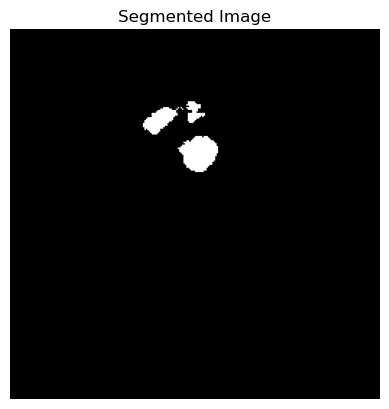

GLCM Properties:
Brightness of the segmented mask: 0.01300048828125
GLCM Properties:
Angular Second Moment (Energy): 0.97160780473426
Contrast: 168.216796875
Correlation: 0.8998044017814204
Variance: 839.2159993883813
Inverse Difference Moment (Homogeneity): 0.997413084045228
Sum Average: 6.669301470588236
Sum Variance: 3188.647200678525
Sum Entropy: 0.11826478771786282
Entropy: 0.12085174345604045
Difference Variance: 0.003870834240255793
Difference Entropy: 0.025913188831278237
Information Measures of Correlation 1: -0.7982856497053137
Information Measures of Correlation 2: 0.3850745680936808


In [37]:
# Load the pre-trained model
model = load_model('path_to_your_model.h5')

# Function to process image
def process_image(image_path, image_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    img = resize(img, image_size, mode='constant', preserve_range=True)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load and process the test image
test_image_path = r'D:\mtech\iii\project\bt classification in 4\Training\glioma_tumor\gg (3).jpg'
processed_img = process_image(test_image_path)

# Predict the mask
predicted_mask = model.predict(processed_img)
predicted_mask = predicted_mask > 0.5  # Threshold the predictions
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension

# Convert predicted mask to uint8
predicted_mask_uint8 = (predicted_mask * 255).astype(np.uint8)

# Compute GLCM using Mahotas
glcm = mh.features.haralick(predicted_mask_uint8)
glcm_mean = glcm.mean(axis=0)

# Display the results
plt.imshow(predicted_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

# Print GLCM properties
print("GLCM Properties:")
# Ensure predicted_mask is the correct format; it should be binary [0,1] from previous steps.
brightness_segmented = np.mean(predicted_mask)
print(f"Brightness of the segmented mask: {brightness_segmented}")
properties = [
    'Angular Second Moment (Energy)',
    'Contrast',
    'Correlation',
    'Variance',
    'Inverse Difference Moment (Homogeneity)',
    'Sum Average',
    'Sum Variance',
    'Sum Entropy',
    'Entropy',
    'Difference Variance',
    'Difference Entropy',
    'Information Measures of Correlation 1',
    'Information Measures of Correlation 2'
]

# Iterate through properties list and print each one
print("GLCM Properties:")
for i, prop in enumerate(properties):
    print(f"{prop}: {glcm_mean[i]}")


1/1 [==============================] - 1s 1s/step


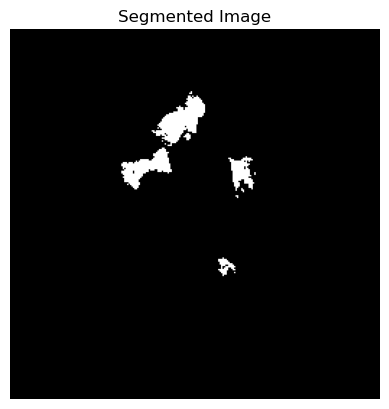

GLCM Properties:
Brightness of the segmented mask: 0.0208282470703125
GLCM Properties:
Angular Second Moment (Energy): 0.9533208391889292
Contrast: 369.8671875
Correlation: 0.8613808001100407
Variance: 1333.7917161301348
Inverse Difference Moment (Homogeneity): 0.994312010772614
Sum Average: 10.684972426470587
Sum Variance: 4965.299677020538
Sum Entropy: 0.18105679858789464
Entropy: 0.18674487528916336
Difference Variance: 0.003846810006655539
Difference Entropy: 0.05053597548407952
Information Measures of Correlation 1: -0.727477417334852
Information Measures of Correlation 2: 0.4383754797444966


In [38]:
model = load_model('path_to_your_model.h5')

# Function to process image
def process_image(image_path, image_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    img = resize(img, image_size, mode='constant', preserve_range=True)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load and process the test image
test_image_path = r'D:\mtech\iii\project\bt classification in 4\Training\no_tumor\image (38).jpg'
processed_img = process_image(test_image_path)

# Predict the mask
predicted_mask = model.predict(processed_img)
predicted_mask = predicted_mask > 0.5  # Threshold the predictions
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension

# Convert predicted mask to uint8
predicted_mask_uint8 = (predicted_mask * 255).astype(np.uint8)

# Compute GLCM using Mahotas
glcm = mh.features.haralick(predicted_mask_uint8)
glcm_mean = glcm.mean(axis=0)

# Display the results
plt.imshow(predicted_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

# Print GLCM properties
print("GLCM Properties:")
# Ensure predicted_mask is the correct format; it should be binary [0,1] from previous steps.
brightness_segmented = np.mean(predicted_mask)
print(f"Brightness of the segmented mask: {brightness_segmented}")
properties = [
    'Angular Second Moment (Energy)',
    'Contrast',
    'Correlation',
    'Variance',
    'Inverse Difference Moment (Homogeneity)',
    'Sum Average',
    'Sum Variance',
    'Sum Entropy',
    'Entropy',
    'Difference Variance',
    'Difference Entropy',
    'Information Measures of Correlation 1',
    'Information Measures of Correlation 2'
]

# Iterate through properties list and print each one
print("GLCM Properties:")
for i, prop in enumerate(properties):
    print(f"{prop}: {glcm_mean[i]}")

In [39]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mh
from skimage.transform import resize
from tensorflow.keras.models import load_model

In [56]:
d1 = r'D:\mtech\iii\project\bt classification in 4(new)\d1\Training\glioma'
d2 = r'D:\mtech\iii\project\bt classification in 4(new)\d1\Training\meningioma'
d3 = r'D:\mtech\iii\project\bt classification in 4(new)\d1\Training\notumor'
d4 = r'D:\mtech\iii\project\bt classification in 4(new)\d1\Training\pituitary'

destination_directory = r'D:\mtech\iii\project\bt classification in 4(new)'

In [58]:
model = load_model('path_to_your_model.h5')

def process_images_and_save_features(source_dir, output_folder):
    filenames = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]  # Adjust the extension if needed
    data = []

    for filename in filenames:
        image_path = os.path.join(source_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = resize(image, (256, 256), mode='constant', preserve_range=True)
            image = image / 255.0
            image = np.expand_dims(image, axis=-1)
            image = np.expand_dims(image, axis=0)
            segmented = model.predict(image)
            segmented = (segmented > 0.5).astype(np.uint8)
            segmented = np.squeeze(segmented)

            glcm = mh.features.haralick(segmented)
            mean_glcm = glcm.mean(axis=0)
            data.append([filename] + mean_glcm.tolist())

    df = pd.DataFrame(data, columns=[
        'Filename', 'Angular Second Moment', 'Contrast', 'Correlation', 'Variance',
        'Inverse Difference Moment', 'Sum Average', 'Sum Variance',
        'Sum Entropy', 'Entropy', 'Difference Variance', 'Difference Entropy',
        'Information Measures of Correlation 1', 'Information Measures of Correlation 2'
    ])

    # Save the dataframe to CSV in the specified output folder
    csv_output_path = os.path.join(output_folder, os.path.basename(source_dir) + '_glcm_features.csv')
    df.to_csv(csv_output_path, index=False)
directories = [d1, d2, d3, d4]
#directories = [d1, d2]
os.makedirs(destination_directory, exist_ok=True)  # Ensure the destination directory exists

for directory in directories:
    process_images_and_save_features(directory, destination_directory)

1/1 [==============================] - 1s 517ms/step


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load data and label it
dataframes = []
for label, filepath in file_paths.items():
    df = pd.read_csv(filepath)
    df['label'] = label
    dataframes.append(df)

# Concatenate all dataframes into one
full_data = pd.concat(dataframes, ignore_index=True)

# Separate features and target
X = full_data.drop(columns=['Filename', 'label'])
y = full_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Adjust n_components to capture the desired variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize and train the classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Initial evaluation
print("Initial SVM Classifier Performance:")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV model
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameter and model selection
print("Best parameters found: ", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_svm.predict(X_test)

# Best model evaluation
print("Tuned SVM Classifier Performance:")
print(classification_report(y_test, y_pred_best))
# Save the tuned model to disk
model_path = r'D:\mtech\iii\project\proper dataset\tuned_trained_svm_model.pkl'
joblib.dump(best_svm, model_path)


Initial SVM Classifier Performance:
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned SVM Classifier Performance:
                  precision    recall  f1-score   support

    glioma_tumor       0.45      0.45      0.45       288
meningioma_tumor       0.61      0.61      0.61       265
        no_tumor       0.69      0.68      0.68       291
 pituitary_tumor       0.43      0.44      0.43       299

        accuracy                           0.54      1143
       macro avg       0.55      0.54      0.54      1143
    weighted avg       0.54      0.54      0.54      1143



['D:\\mtech\\iii\\project\\proper dataset\\tuned_trained_svm_model.pkl']

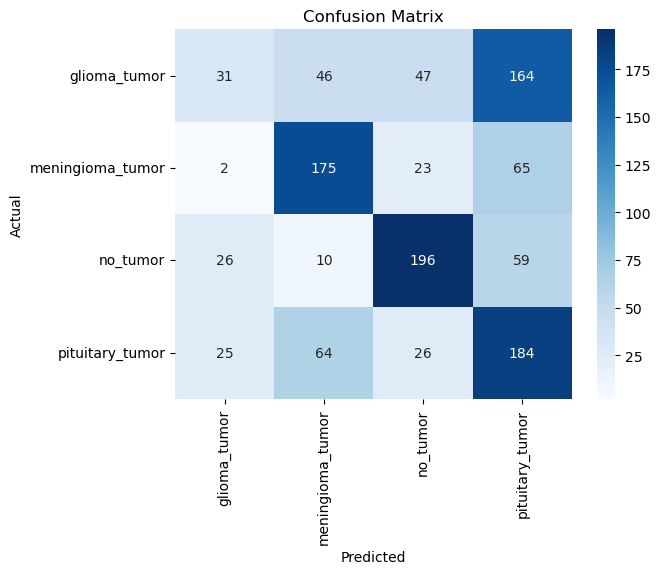

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix heatmap
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=file_paths.keys(), yticklabels=file_paths.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

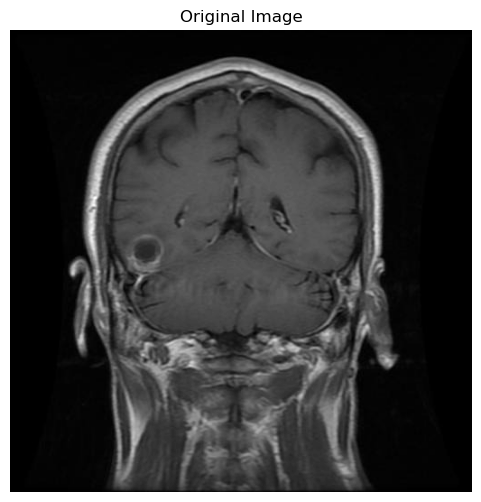

1/1 [==============================] - 1s 750ms/step


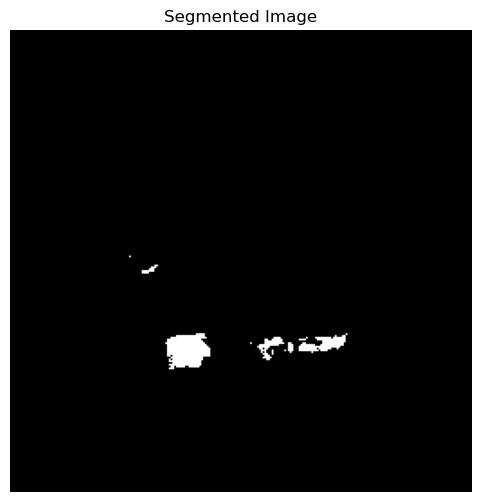

GLCM Features computed:
Angular Second Moment: 0.977534758416357
Contrast: 0.003354689302191465
Correlation: 0.8246179045893294
Variance: 0.00956110358894332
Inverse Difference Moment: 0.9983226553489044
Sum Average: 0.019308619281045748
Sum Variance: 0.03488972505358182
Sum Entropy: 0.09932958853216349
Entropy: 0.10268427783435494
Difference Variance: 0.2466569655942435
Difference Entropy: 0.03231504491508605
Information Measures of Correlation 1: -0.6918576664696083
Information Measures of Correlation 2: 0.32060951594404125
Predicted Class: ['glioma_tumor']


c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [63]:
import cv2
import matplotlib.pyplot as plt

# Specify the path to the image
image_path = r'D:\mtech\iii\project\bt classification in 4(new)\Training\glioma\g(89).jpg'  # Modify as needed

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
model = load_model('path_to_your_model.h5')



# Save the model
model_path = r'D:\mtech\iii\project\bt classification in 4(new)\tuned_trained_svm_model.pkl'
joblib.dump(best_svm, model_path)
processed_image = resize(image, (256, 256), mode='constant', preserve_range=True)
processed_image = processed_image / 255.0  # Normalize to [0, 1]
processed_image = np.expand_dims(processed_image, axis=-1)
processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

# Predict the segmented mask
segmented_mask = model.predict(processed_image)
segmented_mask = (segmented_mask > 0.5).astype(np.uint8).squeeze()  # Threshold and remove batch dimension
# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(segmented_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()
import mahotas as mh

# Compute GLCM features
glcm_features = mh.features.haralick(segmented_mask.astype(np.uint8)).mean(axis=0)

# Printing GLCM features
print("GLCM Features computed:")
features_names = [
    'Angular Second Moment', 'Contrast', 'Correlation', 'Variance',
    'Inverse Difference Moment', 'Sum Average', 'Sum Variance',
    'Sum Entropy', 'Entropy', 'Difference Variance', 'Difference Entropy',
    'Information Measures of Correlation 1', 'Information Measures of Correlation 2'
]
for name, value in zip(features_names, glcm_features):
    print(f"{name}: {value}")
import joblib

# Load the trained SVM model
svm_model = joblib.load('tuned_trained_svm_model.pkl')

# Reshape GLCM features for prediction (classifier expects 2D array)
glcm_features_reshaped = glcm_features.reshape(1, -1)

# Predict using the SVM model
prediction = svm_model.predict(glcm_features_reshaped)

print(f"Predicted Class: {prediction}")


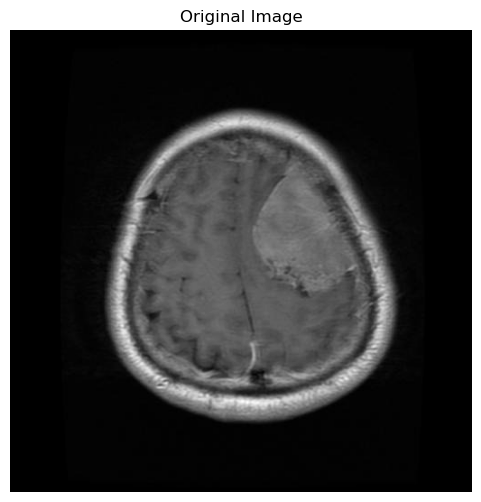

1/1 [==============================] - 1s 799ms/step


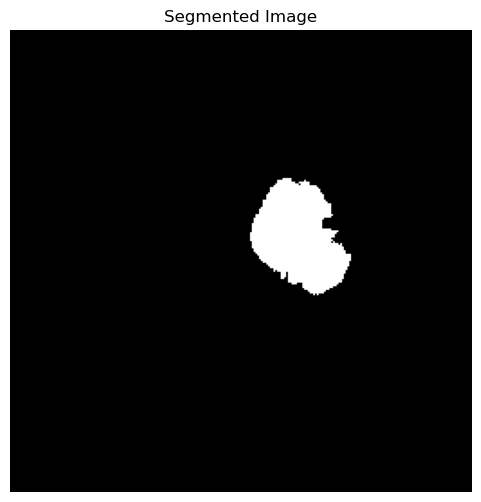

GLCM Features computed:
Angular Second Moment: 0.928384227379537
Contrast: 0.0026561598904267588
Correlation: 0.9614981833063079
Variance: 0.03448343383633362
Inverse Difference Moment: 0.9986719200547867
Sum Average: 0.07152477412533642
Sum Variance: 0.13527757545490773
Sum Entropy: 0.24252818850823005
Entropy: 0.24518434839865683
Difference Variance: 0.24735109505220415
Difference Entropy: 0.026499121281646998
Information Measures of Correlation 1: -0.8981347948387444
Information Measures of Correlation 2: 0.5739743101779986
Predicted Class: ['meningioma_tumor']


c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [64]:
import cv2
import matplotlib.pyplot as plt

# Specify the path to the image
image_path = r'D:\mtech\iii\project\bt classification in 4(new)\Training\meningioma\mm(36).jpg'  # Modify as needed

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
model = load_model('path_to_your_model.h5')

# Process the image to match the model's expected input
processed_image = resize(image, (256, 256), mode='constant', preserve_range=True)
processed_image = processed_image / 255.0  # Normalize to [0, 1]
processed_image = np.expand_dims(processed_image, axis=-1)
processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

# Predict the segmented mask
segmented_mask = model.predict(processed_image)
segmented_mask = (segmented_mask > 0.5).astype(np.uint8).squeeze()  # Threshold and remove batch dimension
# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(segmented_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()
import mahotas as mh

# Compute GLCM features
glcm_features = mh.features.haralick(segmented_mask.astype(np.uint8)).mean(axis=0)

# Printing GLCM features
print("GLCM Features computed:")
features_names = [
    'Angular Second Moment', 'Contrast', 'Correlation', 'Variance',
    'Inverse Difference Moment', 'Sum Average', 'Sum Variance',
    'Sum Entropy', 'Entropy', 'Difference Variance', 'Difference Entropy',
    'Information Measures of Correlation 1', 'Information Measures of Correlation 2'
]
for name, value in zip(features_names, glcm_features):
    print(f"{name}: {value}")
import joblib

# Load the trained SVM model
svm_model = joblib.load('tuned_trained_svm_model.pkl')

# Reshape GLCM features for prediction (classifier expects 2D array)
glcm_features_reshaped = glcm_features.reshape(1, -1)

# Predict using the SVM model
prediction = svm_model.predict(glcm_features_reshaped)

print(f"Predicted Class: {prediction}")


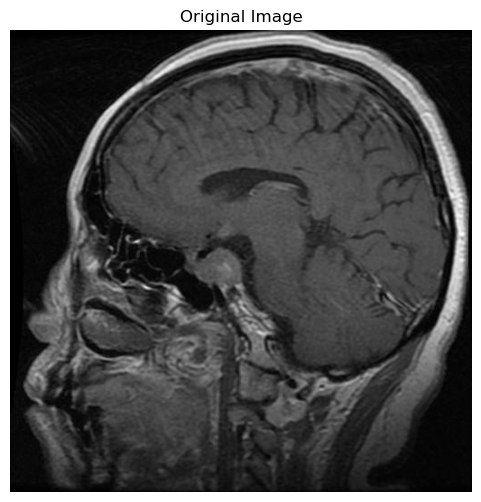

1/1 [==============================] - 1s 769ms/step


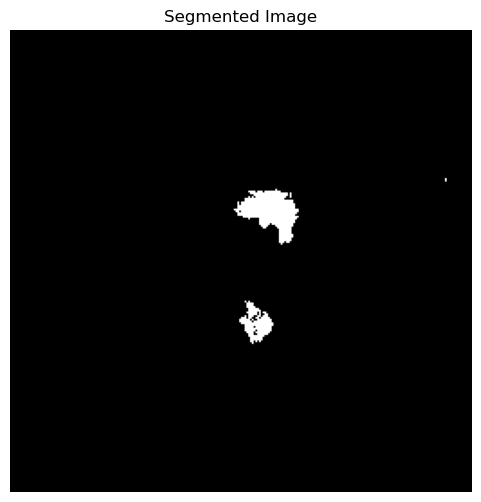

GLCM Features computed:
Angular Second Moment: 0.972541332719746
Contrast: 0.0030320369569396387
Correlation: 0.8759463771187166
Variance: 0.012217980363942336
Inverse Difference Moment: 0.9984839815215302
Sum Average: 0.02474204632833526
Sum Variance: 0.0458398844988297
Sum Entropy: 0.1160591175426588
Entropy: 0.11909115449959845
Difference Variance: 0.2469772934476306
Difference Entropy: 0.029699174023508464
Information Measures of Correlation 1: -0.7611868474806994
Information Measures of Correlation 2: 0.3689221763435245
Predicted Class: ['pituitary_tumor']


c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [65]:
# Specify the path to the image
image_path = r'D:\mtech\iii\project\bt classification in 4(new)\Training\pituitary\p(204).jpg'  # Modify as needed

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
model = load_model('path_to_your_model.h5')

# Process the image to match the model's expected input
processed_image = resize(image, (256, 256), mode='constant', preserve_range=True)
processed_image = processed_image / 255.0  # Normalize to [0, 1]
processed_image = np.expand_dims(processed_image, axis=-1)
processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

# Predict the segmented mask
segmented_mask = model.predict(processed_image)
segmented_mask = (segmented_mask > 0.5).astype(np.uint8).squeeze()  # Threshold and remove batch dimension
# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(segmented_mask, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()
import mahotas as mh

# Compute GLCM features
glcm_features = mh.features.haralick(segmented_mask.astype(np.uint8)).mean(axis=0)

# Printing GLCM features
print("GLCM Features computed:")
features_names = [
    'Angular Second Moment', 'Contrast', 'Correlation', 'Variance',
    'Inverse Difference Moment', 'Sum Average', 'Sum Variance',
    'Sum Entropy', 'Entropy', 'Difference Variance', 'Difference Entropy',
    'Information Measures of Correlation 1', 'Information Measures of Correlation 2'
]
for name, value in zip(features_names, glcm_features):
    print(f"{name}: {value}")
import joblib

# Load the trained SVM model
svm_model = joblib.load('tuned_trained_svm_model.pkl')

# Reshape GLCM features for prediction (classifier expects 2D array)
glcm_features_reshaped = glcm_features.reshape(1, -1)

# Predict using the SVM model
prediction = svm_model.predict(glcm_features_reshaped)

print(f"Predicted Class: {prediction}")

apply meta evalutaor


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns



In [67]:
# Define file paths
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

dataframes = []
for label, filepath in file_paths.items():
    df = pd.read_csv(filepath)
    df['label'] = label
    dataframes.append(df)

# Concatenate all dataframes into one DataFrame
full_data = pd.concat(dataframes, ignore_index=True)

# Separate features and target
X = full_data.drop(columns=['Filename', 'label'])
y = full_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
results = {}
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    results[name] = cv_scores
    print(f"{name}: Mean CV Accuracy={cv_scores.mean():.4f}, Standard Deviation={cv_scores.std():.4f}")
# Assuming 'results' is a dictionary with classifier names as keys and arrays of CV scores as values
mean_scores = {name: np.mean(scores) for name, scores in results.items()}
std_devs = {name: np.std(scores) for name, scores in results.items()}

# Convert to DataFrame for easier plotting
performance_df = pd.DataFrame(list(mean_scores.items()), columns=['Classifier', 'Mean CV Accuracy'])
performance_df['Standard Deviation'] = std_devs.values()


Logistic Regression: Mean CV Accuracy=0.5550, Standard Deviation=0.0174
K-Nearest Neighbors: Mean CV Accuracy=0.5277, Standard Deviation=0.0123
Support Vector Machine: Mean CV Accuracy=0.5616, Standard Deviation=0.0185
Decision Tree: Mean CV Accuracy=0.4889, Standard Deviation=0.0036
Random Forest: Mean CV Accuracy=0.5238, Standard Deviation=0.0129
Gradient Boosting: Mean CV Accuracy=0.5507, Standard Deviation=0.0196


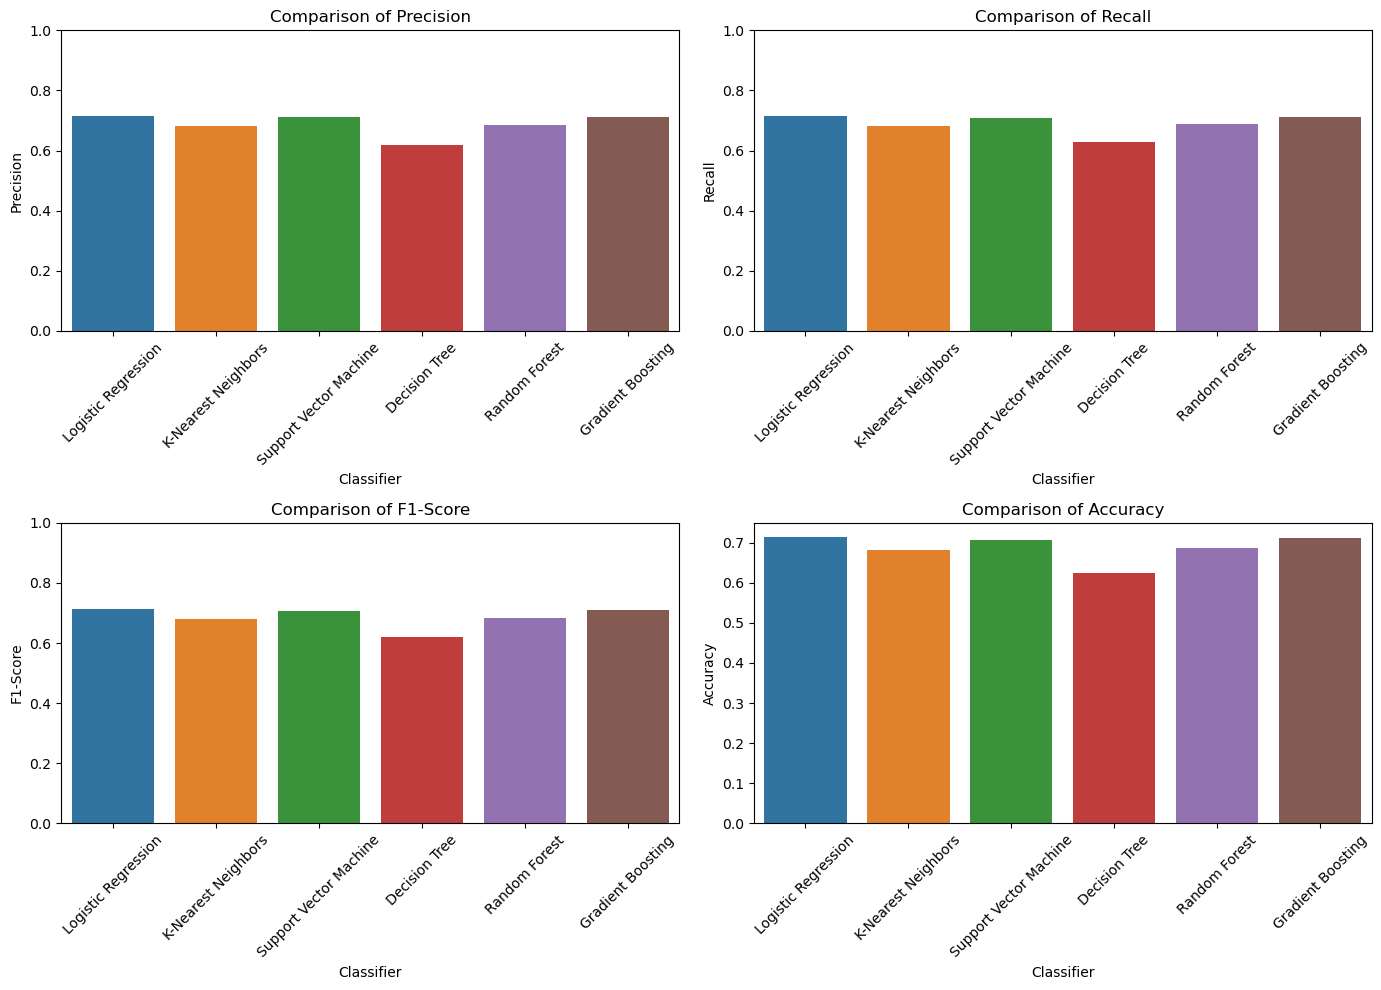

In [50]:
from sklearn.metrics import classification_report
import numpy as np

# Example classifiers trained as shown in previous examples
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Dictionary to store classification reports
class_reports = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    class_reports[name] = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
final_data = {metric: [] for metric in metrics}

for name, report in class_reports.items():
    for metric in metrics:
        if metric == 'accuracy':
            # Accuracy is stored differently
            final_data[metric].append({'Classifier': name, metric: report['accuracy']})
        else:
            # Calculate mean of the metric across all classes
            final_data[metric].append({'Classifier': name, metric: np.mean([report[c][metric] for c in report.keys() if c not in ['accuracy', 'macro avg', 'weighted avg']])})
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Classifier', y=metric, data=pd.DataFrame(final_data[metric]))
    plt.title(f'Comparison of {metric.title()}')
    plt.ylabel(metric.title())
    plt.xticks(rotation=45)
    if metric != 'accuracy':
        plt.ylim(0, 1)  # Adjust limits to zoom in on differences

plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load data and label it
dataframes = []
for label, filepath in file_paths.items():
    df = pd.read_csv(filepath)
    df['label'] = label
    dataframes.append(df)

# Concatenate all dataframes into one
full_data = pd.concat(dataframes, ignore_index=True)

# Separate features and target
X = full_data.drop(columns=['Filename', 'label'])
y = full_data['label']

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test_pca)

# Initial evaluation
print("Initial Gradient Boosting Classifier Performance:")
print(classification_report(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
grid_search.fit(X_train_pca, y_train)

# Best parameter and model selection
print("Best parameters found: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_gb.predict(X_test_pca)

# Best model evaluation
print("Tuned Gradient Boosting Classifier Performance:")
print(classification_report(y_test, y_pred_best))

# Save the tuned model to disk
model_path = r'D:\mtech\iii\project\proper dataset\tuned_trained_gb_model.pkl'
joblib.dump(best_gb, model_path)


Initial Gradient Boosting Classifier Performance:
                  precision    recall  f1-score   support

    glioma_tumor       0.45      0.51      0.48       319
meningioma_tumor       0.62      0.66      0.64       319
        no_tumor       0.74      0.66      0.70       319
 pituitary_tumor       0.36      0.32      0.34       319

        accuracy                           0.54      1276
       macro avg       0.54      0.54      0.54      1276
    weighted avg       0.54      0.54      0.54      1276

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

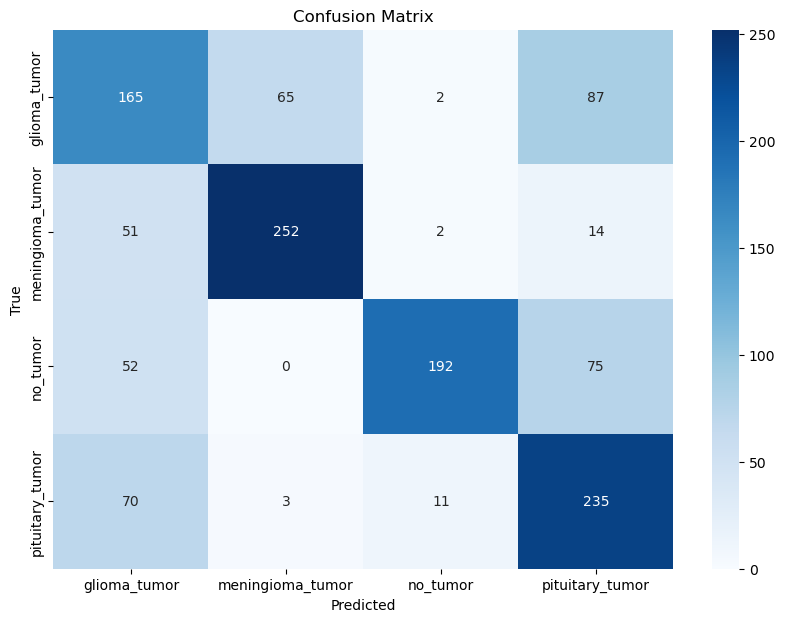

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_gb.classes_, yticklabels=best_gb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.5363079615048119

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.41      0.45      0.43       264
meningioma_tumor       0.60      0.62      0.61       268
        no_tumor       0.77      0.72      0.74       319
 pituitary_tumor       0.35      0.34      0.35       292

        accuracy                           0.54      1143
       macro avg       0.53      0.53      0.53      1143
    weighted avg       0.54      0.54      0.54      1143



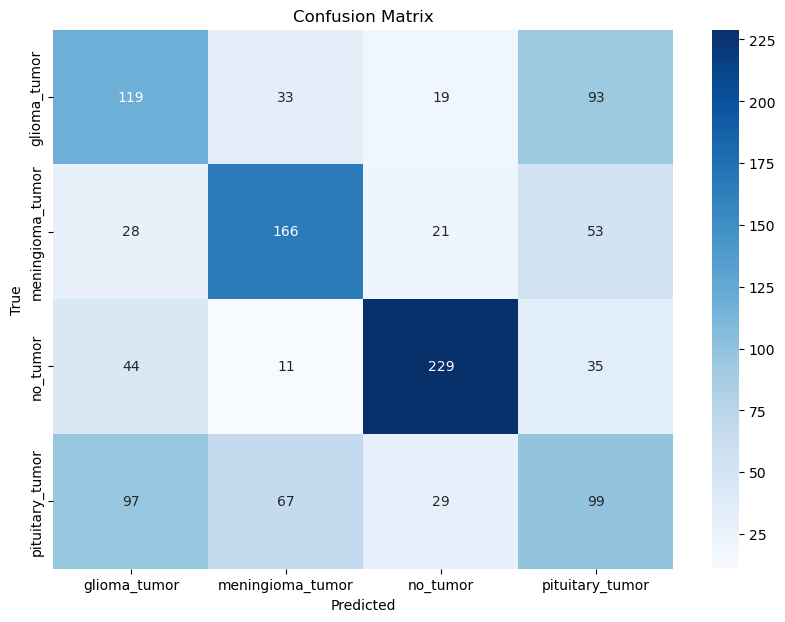

['xgb_model.pkl']

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Ensure all features are numeric
X = data.drop(columns=['label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop columns with NaN values

y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Perform Lasso feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X_train_res, y_train_res)
model = SelectFromModel(lasso, prefit=True)
X_train_res_lasso = model.transform(X_train_res)
X_test_lasso = model.transform(X_test)

# Define the hyperparameters for XGBoost
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300]
}

xgb = XGBClassifier(objective='multi:softprob', num_class=len(target_names))

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_res_lasso, y_train_res)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train_res_lasso, y_train_res)

# Make predictions on the test set
predictions = best_model.predict(X_test_lasso)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=target_names))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(best_model, 'xgb_model.pkl')


[0]	validation_0-mlogloss:1.32591	validation_0-merror:0.41007	validation_1-mlogloss:1.33276	validation_1-merror:0.47069


c:\Users\Deepak\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Deepak\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:1.27470	validation_0-merror:0.40302	validation_1-mlogloss:1.28805	validation_1-merror:0.46894
[2]	validation_0-mlogloss:1.22988	validation_0-merror:0.39283	validation_1-mlogloss:1.25087	validation_1-merror:0.46544
[3]	validation_0-mlogloss:1.19108	validation_0-merror:0.38832	validation_1-mlogloss:1.21943	validation_1-merror:0.46982
[4]	validation_0-mlogloss:1.15671	validation_0-merror:0.38303	validation_1-mlogloss:1.19241	validation_1-merror:0.46982
[5]	validation_0-mlogloss:1.12711	validation_0-merror:0.38225	validation_1-mlogloss:1.16856	validation_1-merror:0.46807
[6]	validation_0-mlogloss:1.10100	validation_0-merror:0.38695	validation_1-mlogloss:1.14782	validation_1-merror:0.46807
[7]	validation_0-mlogloss:1.07674	validation_0-merror:0.38068	validation_1-mlogloss:1.13012	validation_1-merror:0.46282
[8]	validation_0-mlogloss:1.05549	validation_0-merror:0.37872	validation_1-mlogloss:1.11454	validation_1-merror:0.45932
[9]	validation_0-mlogloss:1.03608	valida

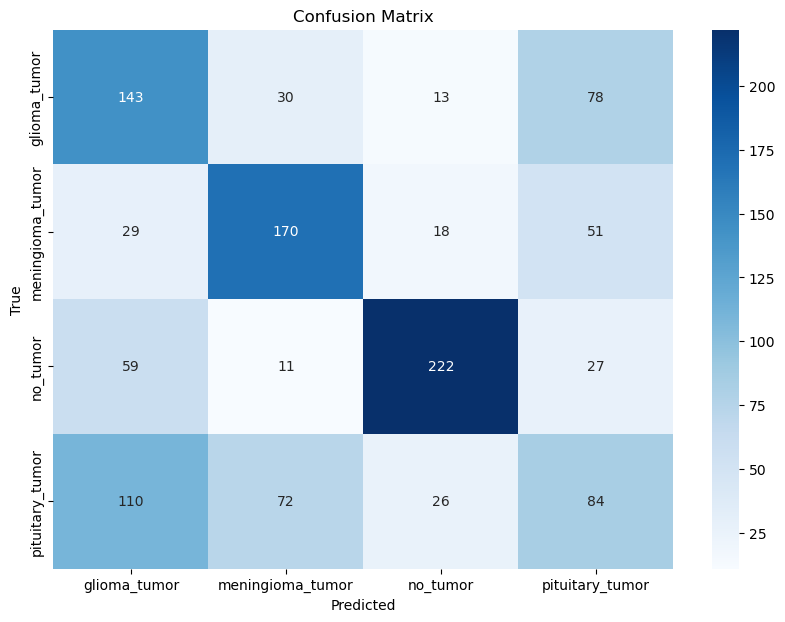

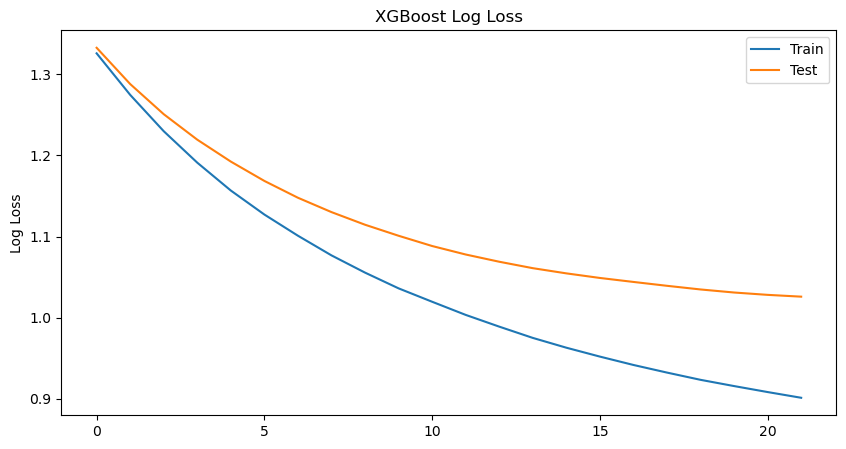

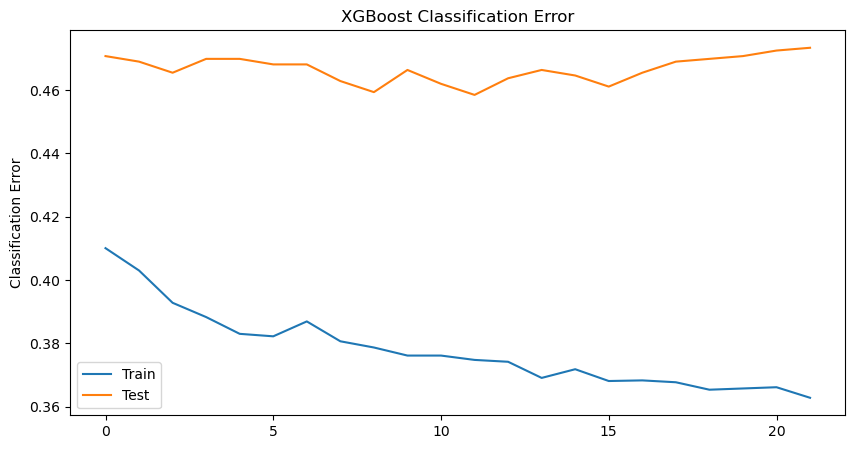

['xgb_model.pkl']

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Split the data into features and target
X = data.drop(columns=['label'])
y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Ensure X contains only numeric data
X_numeric = X.select_dtypes(include=['number'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Define the hyperparameters
num_classes = len(target_names)
max_depth = 6
learning_rate = 0.1
subsample = 0.8
colsample = 0.8
num_estimators = 100

# Initialize the XGBoost model
model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    max_depth=max_depth,
    learning_rate=learning_rate,
    subsample=subsample,
    colsample_bytree=colsample,
    n_estimators=num_estimators
)

# Define the evaluation set
eval_set = [(X_train_res, y_train_res), (X_test, y_test)]

# Train the model with evaluation set
model.fit(X_train_res, y_train_res, eval_metric=['mlogloss', 'merror'], eval_set=eval_set, verbose=True, early_stopping_rounds=10)

# Retrieve the evaluation results
eval_result = model.evals_result()

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation metrics
epochs = len(eval_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Log loss
plt.figure(figsize=(10, 5))
plt.plot(x_axis, eval_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, eval_result['validation_1']['mlogloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Classification error
plt.figure(figsize=(10, 5))
plt.plot(x_axis, eval_result['validation_0']['merror'], label='Train')
plt.plot(x_axis, eval_result['validation_1']['merror'], label='Test')
plt.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# Save the model
joblib.dump(model, 'xgb_model.pkl')


c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neural_network\_

Accuracy: 0.7270341207349081

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.62      0.66      0.64       264
meningioma_tumor       0.83      0.75      0.79       268
        no_tumor       0.84      0.73      0.78       319
 pituitary_tumor       0.65      0.76      0.70       292

        accuracy                           0.73      1143
       macro avg       0.74      0.73      0.73      1143
    weighted avg       0.74      0.73      0.73      1143



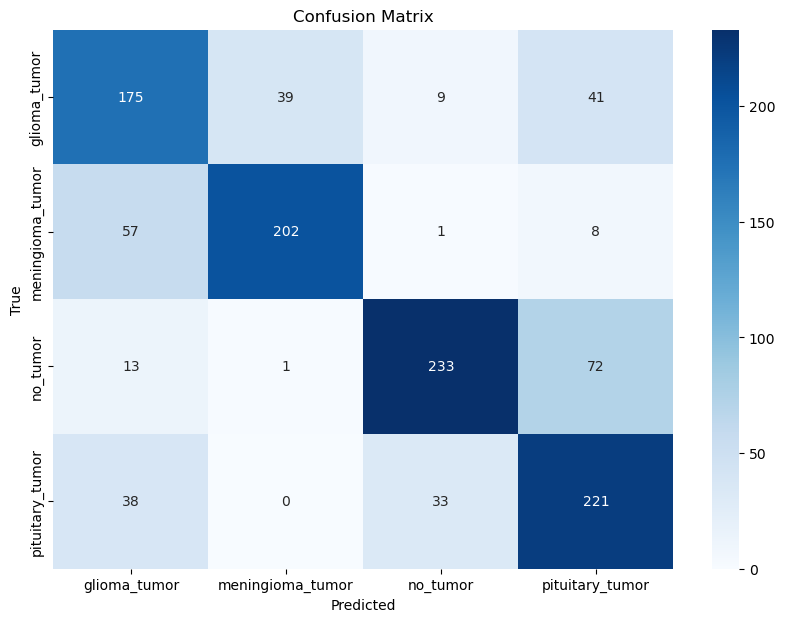

['mlp_model.pkl']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Ensure all features are numeric
X = data.drop(columns=['label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop columns with NaN values

y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Perform Lasso feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X_train_res, y_train_res)
model = SelectFromModel(lasso, prefit=True)
X_train_res_lasso = model.transform(X_train_res)
X_test_lasso = model.transform(X_test)

# Define the hyperparameters for MLP
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPClassifier(max_iter=300, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_res_lasso, y_train_res)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train_res_lasso, y_train_res)

# Make predictions on the test set
predictions = best_model.predict(X_test_lasso)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=target_names))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(best_model, 'mlp_model.pkl')


Accuracy: 0.720536756126021

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.62      0.63      0.62       396
meningioma_tumor       0.83      0.76      0.79       402
        no_tumor       0.86      0.70      0.77       479
 pituitary_tumor       0.62      0.79      0.70       437

        accuracy                           0.72      1714
       macro avg       0.73      0.72      0.72      1714
    weighted avg       0.74      0.72      0.72      1714



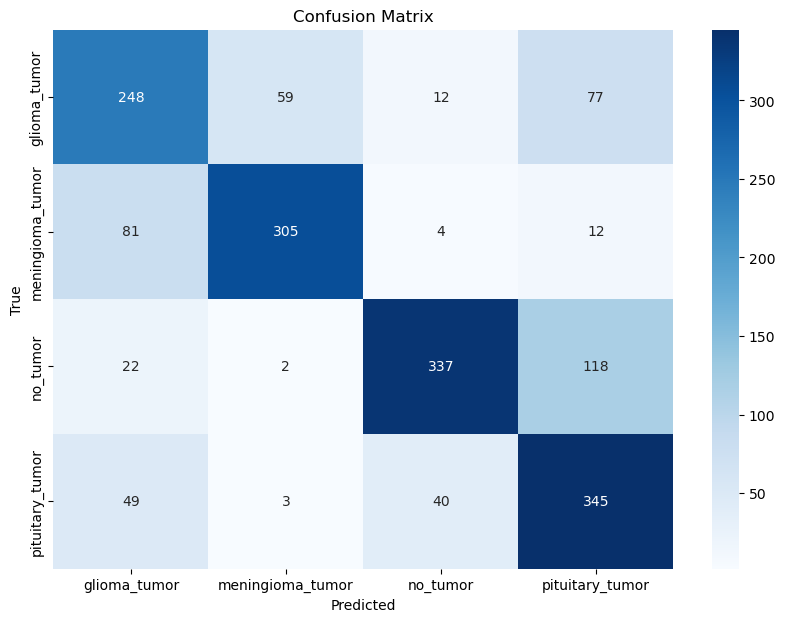

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Ensure all features are numeric
X = data.drop(columns=['label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop columns with NaN values

y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features using a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

# Train the SVM model
svm_pipeline.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = svm_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.6964129483814523

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.59      0.57      0.58       264
meningioma_tumor       0.78      0.72      0.75       268
        no_tumor       0.81      0.79      0.80       319
 pituitary_tumor       0.60      0.69      0.64       292

        accuracy                           0.70      1143
       macro avg       0.70      0.69      0.69      1143
    weighted avg       0.70      0.70      0.70      1143



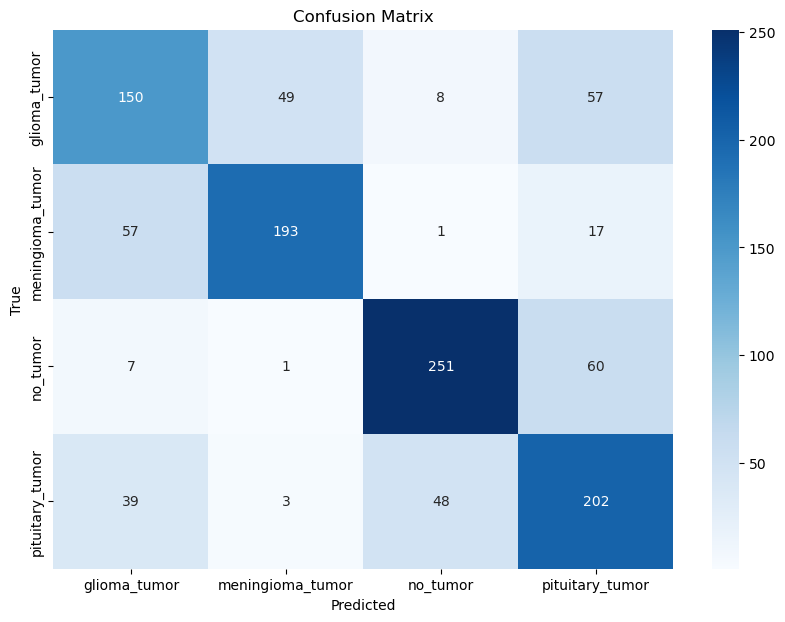

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Ensure all features are numeric
X = data.drop(columns=['label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop columns with NaN values

y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.720536756126021

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.61      0.59      0.60       396
meningioma_tumor       0.80      0.77      0.78       402
        no_tumor       0.83      0.78      0.80       479
 pituitary_tumor       0.65      0.73      0.69       437

        accuracy                           0.72      1714
       macro avg       0.72      0.72      0.72      1714
    weighted avg       0.72      0.72      0.72      1714



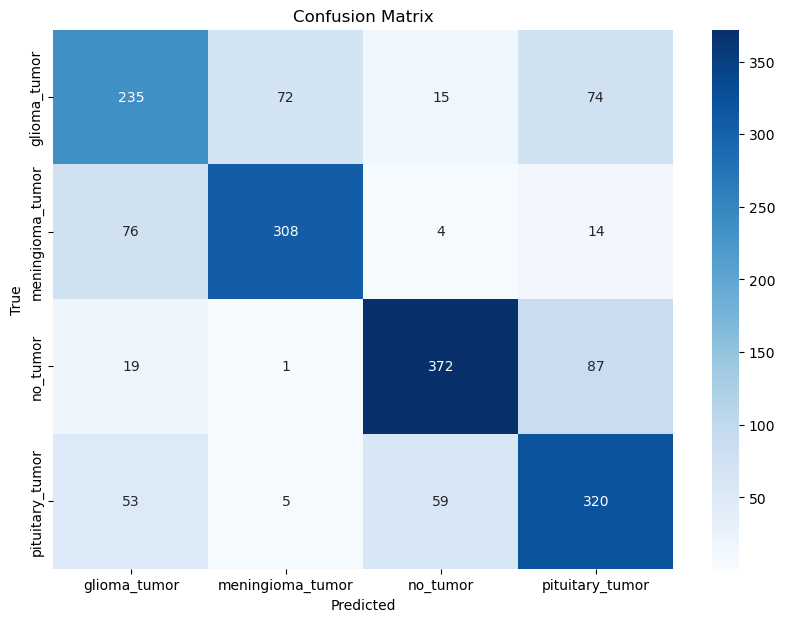

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Ensure all features are numeric
X = data.drop(columns=['label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop columns with NaN values

y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Epoch 1/200
715/715 [==============================] - 12s 11ms/step - loss: 1.1236 - accuracy: 0.5595 - val_loss: 0.7628 - val_accuracy: 0.6820 - lr: 0.0010
Epoch 2/200
715/715 [==============================] - 8s 12ms/step - loss: 0.9952 - accuracy: 0.5948 - val_loss: 0.7143 - val_accuracy: 0.7189 - lr: 0.0010
Epoch 3/200
715/715 [==============================] - 6s 9ms/step - loss: 0.9266 - accuracy: 0.6203 - val_loss: 0.7669 - val_accuracy: 0.6775 - lr: 0.0010
Epoch 4/200
715/715 [==============================] - 8s 12ms/step - loss: 0.9084 - accuracy: 0.6236 - val_loss: 0.7476 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 5/200
715/715 [==============================] - 8s 11ms/step - loss: 0.8874 - accuracy: 0.6323 - val_loss: 0.7268 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 6/200
715/715 [==============================] - 8s 11ms/step - loss: 0.8979 - accuracy: 0.6343 - val_loss: 0.7158 - val_accuracy: 0.7122 - lr: 0.0010
Epoch 7/200
715/715 [==============================] - 8s 

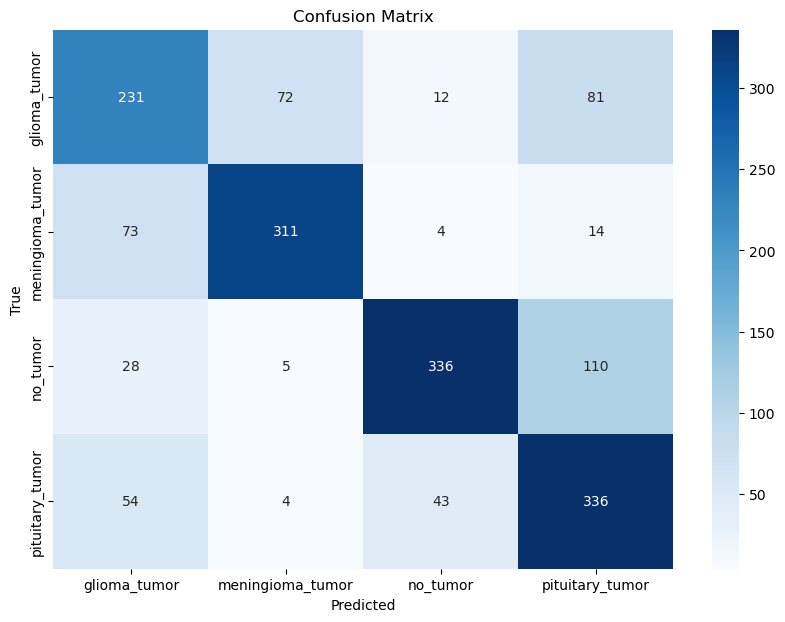

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Paths to the CSV files
file_paths = {
    'glioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\glioma_glcm_features.csv',
    'meningioma_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\meningioma_glcm_features.csv',
    'no_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\notumor_glcm_features.csv',
    'pituitary_tumor': r'D:\mtech\iii\project\bt classification in 4(new)\pituitary_glcm_features.csv'
}

# Load the data
data = []
labels = []
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    data.append(df)
    labels.extend([label] * len(df))

# Combine the data into a single DataFrame
data = pd.concat(data, ignore_index=True)
data['label'] = labels

# Ensure all features are numeric
X = data.drop(columns=['label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop columns with NaN values

y = data['label']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train_res_cat = to_categorical(y_train_res)
y_test_cat = to_categorical(y_test)

# Build the neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_res.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(target_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and reducing learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train_res, y_train_res_cat, epochs=200, batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
